<a href="https://colab.research.google.com/github/comet-ctrl/SP500_prediction/blob/main/OJ_LSTM_Time_Series_Forceasting_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
csv_path

'/root/.keras/datasets/jena_climate_2009_2016_extracted'

In [4]:
df = pd.read_csv(csv_path + "/jena_climate_2009_2016.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [6]:
df.index = pd.to_datetime(df["Date Time"], format = '%d.%m.%Y %H:%M:%S')
df[::26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-02 03:00:00,02.01.2009 03:00:00,998.69,-4.45,268.81,-5.15,94.8,4.39,4.16,0.23,2.59,4.16,1292.69,0.65,1.00,203.3
2009-01-03 05:00:00,03.01.2009 05:00:00,1001.65,-7.02,266.01,-8.10,91.9,3.60,3.31,0.29,2.06,3.31,1309.46,0.48,0.88,193.9
2009-01-04 07:00:00,04.01.2009 07:00:00,989.90,-1.09,272.86,-2.65,89.1,5.64,5.02,0.61,3.16,5.08,1265.04,2.75,5.75,246.8
2009-01-05 09:00:00,05.01.2009 09:00:00,988.42,-3.11,270.95,-4.35,91.1,4.85,4.42,0.43,2.79,4.47,1272.89,1.61,4.63,187.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 19:10:00,26.12.2016 19:10:00,1000.83,5.41,278.50,0.69,71.5,8.98,6.42,2.56,4.00,6.42,1248.54,2.90,6.85,268.5
2016-12-27 21:10:00,27.12.2016 21:10:00,1011.33,5.88,278.15,3.01,81.7,9.28,7.58,1.70,4.68,7.50,1258.98,2.88,5.13,264.0
2016-12-28 23:10:00,28.12.2016 23:10:00,1015.29,3.50,275.46,2.08,90.4,7.85,7.10,0.75,4.36,6.99,1275.05,1.29,1.82,103.3


<Axes: xlabel='Date Time'>

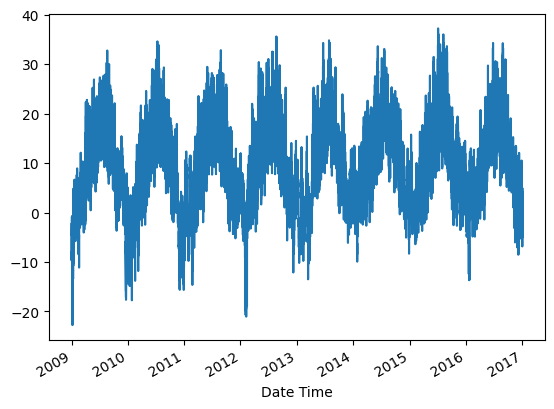

In [7]:
temp = df['T (degC)']
temp.plot()

In [8]:
def df_to_X_y(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [10]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam




In [12]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cp = ModelCheckpoint('model1/best_model.keras', save_best_only = True)
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])


In [14]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks = [cp])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 77.7870 - root_mean_squared_error: 8.6075 - val_loss: 1.2046 - val_root_mean_squared_error: 1.0976
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.1883 - root_mean_squared_error: 1.7770 - val_loss: 0.6233 - val_root_mean_squared_error: 0.7895
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.0952 - root_mean_squared_error: 1.0451 - val_loss: 0.5452 - val_root_mean_squared_error: 0.7384
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.7699 - root_mean_squared_error: 0.8773 - val_loss: 0.5115 - val_root_mean_squared_error: 0.7152
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7038 - root_mean_squared_error: 0.8388 - val_loss: 0.5030 - val_root_mean_squared_error: 0.7092
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6752 - root_mean_squared_error: 0.8217 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7048
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━

In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/best_model.keras')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions':train_predictions, "Actuals":y_train})
train_results


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


,Train Predictions,Actuals
0,-9.799614,-9.67
1,-9.627111,-9.17
2,-8.837514,-8.10
3,-7.479725,-7.66
4,-7.313891,-7.04
...,...,...
59995,6.106019,6.07
59996,7.195781,9.88
59997,12.498529,13.53
59998,15.989419,15.43


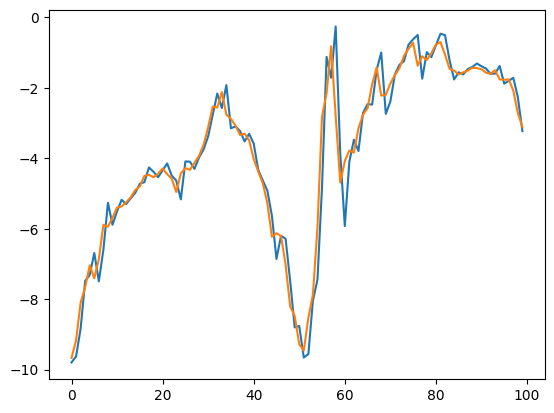

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [18]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Val Predictions,Actuals
0,15.398755,14.02
1,13.202875,13.67
2,13.014225,12.27
3,11.421895,11.19
4,10.343146,10.85
...,...,...
4995,17.305557,18.27
4996,17.296970,17.85
4997,17.153528,16.65
4998,15.851645,15.85


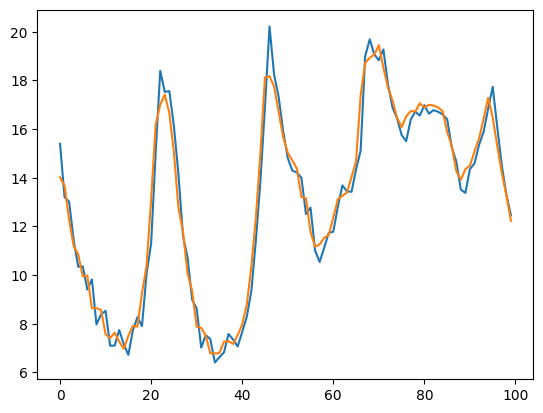

In [19]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [20]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test Predictions':test_predictions, 'Actuals':y_test})
test_results


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test Predictions,Actuals
0,14.348892,13.99
1,13.195374,13.46
2,12.826494,12.93
3,12.429198,12.43
4,11.997370,12.17
...,...,...
5081,-1.216556,-0.98
5082,-1.389042,-1.40
5083,-1.617181,-2.75
5084,-3.512933,-2.89


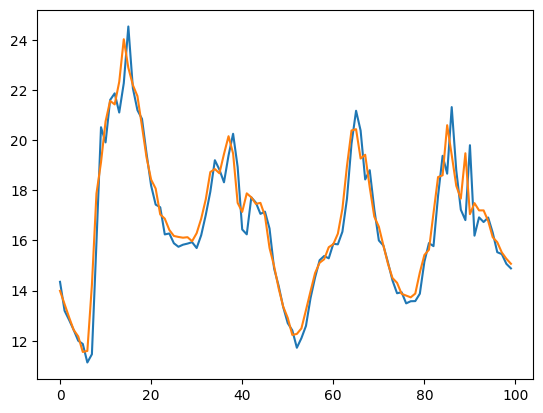

In [21]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

# Part 2

In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start = 0, end = 100):
  predictions = model.predict(X).flatten()
  results = pd.DataFrame(data = {'Predictions': predictions, 'Actuals':y})
  plt.plot(results[start:end]['Predictions'])
  plt.plot(results[start:end]['Actuals'])
  return df, mse(y, predictions)

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(                               Date Time  p (mbar)  T (degC)  Tpot (K)  \
 Date Time                                                                
 2009-01-01 01:00:00  01.01.2009 01:00:00    996.50     -8.05    265.38   
 2009-01-01 02:00:00  01.01.2009 02:00:00    996.62     -8.88    264.54   
 2009-01-01 03:00:00  01.01.2009 03:00:00    996.84     -8.81    264.59   
 2009-01-01 04:00:00  01.01.2009 04:00:00    996.99     -9.05    264.34   
 2009-01-01 05:00:00  01.01.2009 05:00:00    997.46     -9.63    263.72   
 ...                                  ...       ...       ...       ...   
 2016-12-31 19:10:00  31.12.2016 19:10:00   1002.18     -0.98    272.01   
 2016-12-31 20:10:00  31.12.2016 20:10:00   1001.40     -1.40    271.66   
 2016-12-31 21:10:00  31.12.2016 21:10:00   1001.19     -2.75    270.32   
 2016-12-31 22:10:00  31.12.2016 22:10:00   1000.65     -2.89    270.22   
 2016-12-31 23:10:00  31.12.2016 23:10:00   1000.11     -3.93    269.23   
 
                      T

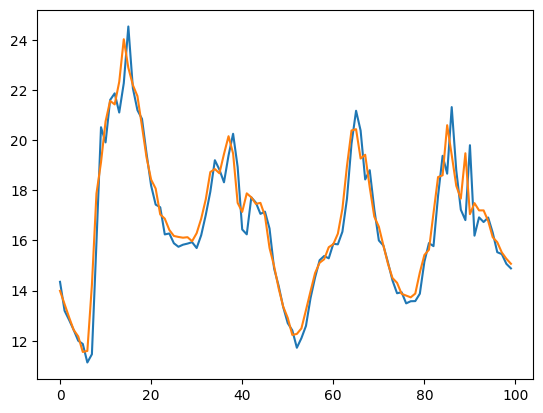

In [23]:
plot_predictions1(model1, X_test, y_test)

In [24]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size = 2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cp2 = ModelCheckpoint('model2/best_model.keras', save_best_only = True)
model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [26]:
model2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 16.9797 - root_mean_squared_error: 3.7307 - val_loss: 1.0015 - val_root_mean_squared_error: 1.0007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.2183 - root_mean_squared_error: 1.1030 - val_loss: 0.7057 - val_root_mean_squared_error: 0.8401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.8765 - root_mean_squared_error: 0.9359 - val_loss: 0.5587 - val_root_mean_squared_error: 0.7474
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7414 - root_mean_squared_error: 0.8609 - val_loss: 0.5404 - val_root_mean_squared_error: 0.7351
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6983 - root_mean_squared_error: 0.8356 - val_loss: 0.5139 - val_root_mean_squared_error: 0.7169
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6888 - root_mean_squared_error: 0.8299 - val_loss: 0.5122 - val_root_mean_squared_error: 0.7157
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━

In [27]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
cp3 = ModelCheckpoint('model3/best_model.keras', save_best_only = True)
model3.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [29]:
model3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks=[cp3])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 86.2186 - root_mean_squared_error: 9.1051 - val_loss: 1.6025 - val_root_mean_squared_error: 1.2659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.7726 - root_mean_squared_error: 2.1714 - val_loss: 0.6653 - val_root_mean_squared_error: 0.8157
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.2770 - root_mean_squared_error: 1.1289 - val_loss: 0.5439 - val_root_mean_squared_error: 0.7375
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.8075 - root_mean_squared_error: 0.8984 - val_loss: 0.5167 - val_root_mean_squared_error: 0.7188
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.7031 - root_mean_squared_error: 0.8385 - val_loss: 0.5207 - val_root_mean_squared_error: 0.7216
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6574 - root_mean_squared_error: 0.8107 - val_loss: 0.5036 - val_root_mean_squared_error: 0.7096
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━

In [30]:
temp_df = pd.DataFrame({'Temperature' : temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [31]:
day = 60 * 60*24
year = 365.2425 * day
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2* np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2* np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2* np.pi/year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [32]:
temp_df = temp_df.drop('Seconds', axis = 1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [33]:
temp_df[0:1]

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.99995


In [34]:
def df_to_X_y2(df, window_size = 6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [35]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [36]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [37]:
temp_training_mean = np.mean(X2_train[ :, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[ :, :, 0] = (X[:, :, 0] - temp_training_mean)/temp_training_std
    return X

In [38]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)


array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [39]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
cp4 = ModelCheckpoint('model4/best_model.keras', save_best_only = True)
model4.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [41]:
model4.fit(X2_train, y2_train, validation_data = (X2_val, y2_val), epochs = 10, callbacks = [cp4])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 71.8114 - root_mean_squared_error: 8.1795 - val_loss: 4.3368 - val_root_mean_squared_error: 2.0825
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 6.5907 - root_mean_squared_error: 2.5622 - val_loss: 2.0791 - val_root_mean_squared_error: 1.4419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.4152 - root_mean_squared_error: 1.5506 - val_loss: 0.9944 - val_root_mean_squared_error: 0.9972
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.1631 - root_mean_squared_error: 1.0781 - val_loss: 0.7312 - val_root_mean_squared_error: 0.8551
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.8763 - root_mean_squared_error: 0.9358 - val_loss: 0.5963 - val_root_mean_squared_error: 0.7722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.6998 - root_mean_squared_error: 0.8363 - val_loss: 0.4735 - val_root_mean_squared_error: 0.6881
Epoch 7/10
1875/1875 ━━━━━━━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(                               Date Time  p (mbar)  T (degC)  Tpot (K)  \
 Date Time                                                                
 2009-01-01 01:00:00  01.01.2009 01:00:00    996.50     -8.05    265.38   
 2009-01-01 02:00:00  01.01.2009 02:00:00    996.62     -8.88    264.54   
 2009-01-01 03:00:00  01.01.2009 03:00:00    996.84     -8.81    264.59   
 2009-01-01 04:00:00  01.01.2009 04:00:00    996.99     -9.05    264.34   
 2009-01-01 05:00:00  01.01.2009 05:00:00    997.46     -9.63    263.72   
 ...                                  ...       ...       ...       ...   
 2016-12-31 19:10:00  31.12.2016 19:10:00   1002.18     -0.98    272.01   
 2016-12-31 20:10:00  31.12.2016 20:10:00   1001.40     -1.40    271.66   
 2016-12-31 21:10:00  31.12.2016 21:10:00   1001.19     -2.75    270.32   
 2016-12-31 22:10:00  31.12.2016 22:10:00   1000.65     -2.89    270.22   
 2016-12-31 23:10:00  31.12.2016 23:10:00   1000.11     -3.93    269.23   
 
                      T

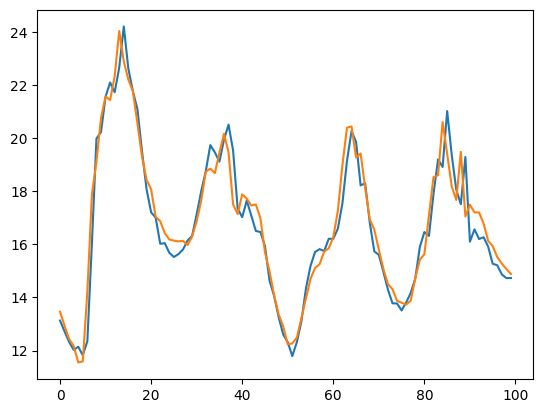

In [42]:
plot_predictions1(model4, X2_test, y2_test)

In [43]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis = 1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [44]:
def df_to_X_y3(df, window_size = 7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0:2]
    y.append(label)
  return np.array(X), np.array(y)

In [45]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [46]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [47]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])
temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :,1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3)    / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
    return X
def preprocess_output(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [48]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [49]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [50]:
model5 = Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(2,'linear'))
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
cp5 = ModelCheckpoint('model5/best_model.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [52]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.3716 - root_mean_squared_error: 0.5863 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0302 - root_mean_squared_error: 0.1737 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1306
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

In [55]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.403690,0.412451,-0.781371,-0.793439
1,0.360644,0.353683,-0.767886,-0.763123
2,0.319445,0.323123,-0.732544,-0.721893
3,0.321922,0.250251,-0.679755,-0.652773
4,0.276796,0.254952,-0.595551,-0.652773
...,...,...,...,...
5079,-1.277231,-1.222477,1.605436,1.601508
5080,-1.309784,-1.271843,1.579750,1.506923
5081,-1.318853,-1.430516,1.479717,1.481458
5082,-1.493473,-1.446971,1.432783,1.415976


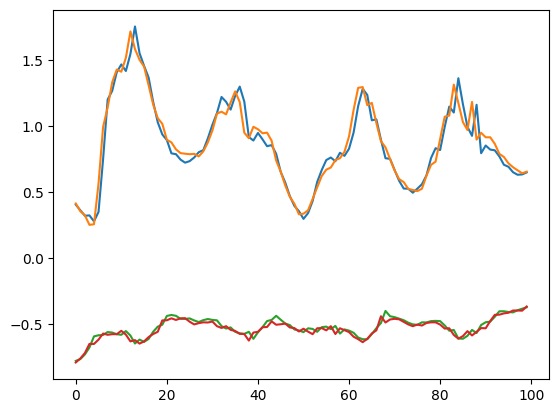

In [56]:
plot_predictions2(model5, X3_test, y3_test)

In [57]:
def post_process_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr
def post_process_p(arr):
    arr = (arr*p_training_std3) + p_training_mean3
    return arr


In [64]:
def plot_predictions3(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = post_process_p(predictions[:, 0]), post_process_temp(predictions[:, 1])
  p_actuals, temp_actuals = post_process_p(y[:, 0]), post_process_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.855461,12.93,982.529513,982.43
1,12.489230,12.43,982.640723,982.68
2,12.138705,12.17,982.932171,983.02
3,12.159783,11.55,983.367495,983.59
4,11.775850,11.59,984.061887,983.59
...,...,...,...,...
5079,-1.445848,-0.98,1002.212390,1002.18
5080,-1.722804,-1.40,1002.000566,1001.40
5081,-1.799968,-2.75,1001.175644,1001.19
5082,-3.285637,-2.89,1000.788600,1000.65


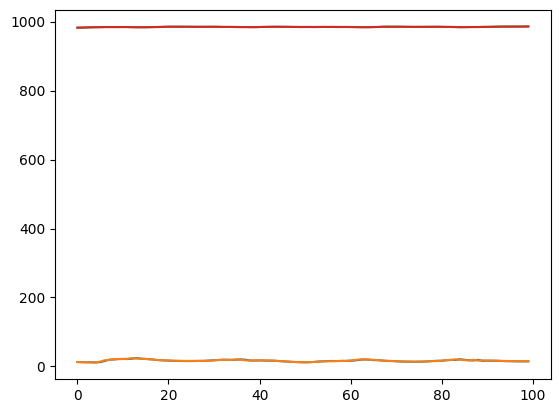

In [65]:
post_processed_df = plot_predictions3(model5, X3_test, y3_test)
post_processed_df

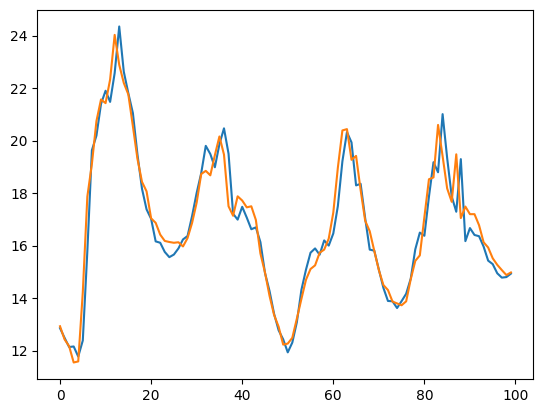

In [66]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

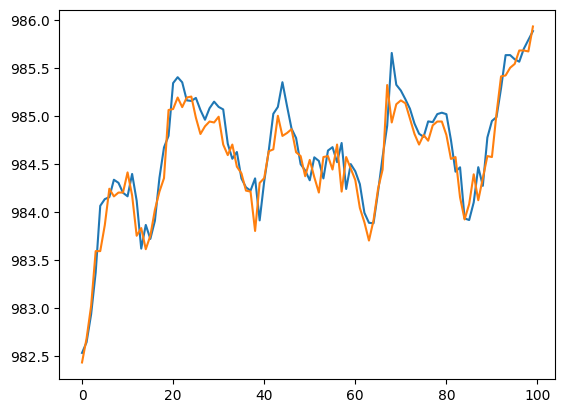

In [67]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [69]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 7, 32)          │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,362 (118.60 KB)

 Trainable params: 30,362 (118.60 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
cp6 = ModelCheckpoint('model6/best_model.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [72]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.2950 - root_mean_squared_error: 0.5156 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0381 - root_mean_squared_error: 0.1951 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1124
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0082 - root_mean_squared_error: 0.0903 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0062 - root_mean_squared_error: 0.0788 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━

In [75]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 6, 64)          │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │         3,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,930 (15.35 KB)

 Trainable params: 3,930 (15.35 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
cp7 = ModelCheckpoint('model7/best_model.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [77]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3859 - root_mean_squared_error: 0.5944 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0191 - root_mean_squared_error: 0.1381 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0092 - root_mean_squared_error: 0.0957 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0795
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━